In [25]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = tfds.load('iris', split='train')
print(iris)
print(next(iris.as_numpy_iterator()))

<PrefetchDataset shapes: {features: (4,), label: ()}, types: {features: tf.float32, label: tf.int64}>
{'features': array([5.1, 3.4, 1.5, 0.2], dtype=float32), 'label': 0}


In [3]:
Xy_train_ori = iris.take(100)
Xy_test_ori = iris.take(50)

In [4]:
#https://stackoverflow.com/questions/62931610/warningtensorflowautograph-could-not-transform-function-format-example-at

In [5]:
def transform_data(x):
    return (x['features'], x['label'])

Xy_train = Xy_train_ori.map(tf.autograph.experimental.do_not_convert(transform_data))
Xy_test = Xy_test_ori.map(tf.autograph.experimental.do_not_convert(transform_data))
print(next(Xy_train.as_numpy_iterator()))

(array([5.1, 3.4, 1.5, 0.2], dtype=float32), 0)


In [8]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='sigmoid', name='fc1'),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')
    ])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [16]:
print(model.layers)

[<tensorflow.python.keras.layers.core.Dense object at 0x000001FF48307220>, <tensorflow.python.keras.layers.core.Dense object at 0x000001FF46F6C190>]


In [22]:
weights, bias = model.layers[0].get_weights()

print(weights.shape)
print(bias.shape)
print(weights)
print(bias)

(4, 16)
(16,)
[[ 0.35514516 -0.2792804   0.04334778  0.17706299 -0.50316375  0.5405655
  -0.19077176 -0.44282132  0.36389714 -0.21942875  0.10177368  0.07605243
  -0.4506632  -0.3632839  -0.26994106  0.47964513]
 [-0.48009783  0.03251231  0.40220034  0.28963333  0.38651252 -0.15595001
   0.2545148  -0.4524336  -0.21089265 -0.32982928 -0.17684829 -0.22520342
  -0.31201184 -0.3274889   0.39078516 -0.32900044]
 [-0.30116278 -0.09773907  0.2868504   0.03588784 -0.38267154 -0.4586689
  -0.37834233  0.2813784  -0.13704947 -0.10498431 -0.05609623 -0.20632562
   0.48132098  0.10042161 -0.5025847   0.5274397 ]
 [ 0.14159316  0.3014751  -0.5436698  -0.09868398 -0.33663693  0.20130348
   0.09892571  0.18329513  0.10380316 -0.49312901  0.07414001 -0.20993388
   0.4097091  -0.5031449  -0.05404875  0.01837939]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
Xy_train_batch = Xy_train.shuffle(100).batch(batch_size=3)

history = model.fit(Xy_train_batch,
        epochs=100, 
        verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 395us/step - loss: 1.1925 - accuracy: 0.3100
Epoch 2/100
34/34 [==============================] - 0s 353us/step - loss: 1.1510 - accuracy: 0.3100
Epoch 3/100
34/34 [==============================] - 0s 353us/step - loss: 1.1261 - accuracy: 0.3100
Epoch 4/100
34/34 [==============================] - 0s 382us/step - loss: 1.1006 - accuracy: 0.3800
Epoch 5/100
34/34 [==============================] - 0s 373us/step - loss: 1.0725 - accuracy: 0.4400
Epoch 6/100
34/34 [==============================] - 0s 382us/step - loss: 1.0494 - accuracy: 0.4600
Epoch 7/100
34/34 [==============================] - 0s 412us/step - loss: 1.0225 - accuracy: 0.7800
Epoch 8/100
34/34 [==============================] - 0s 353us/step - loss: 0.9951 - accuracy: 0.7500
Epoch 9/100
34/34 [==============================] - 0s 382us/step - loss: 0.9648 - accuracy: 0.9400
Epoch 10/100
34/34 [==============================] - 0s 353us/step - loss: 0.9349 - accura

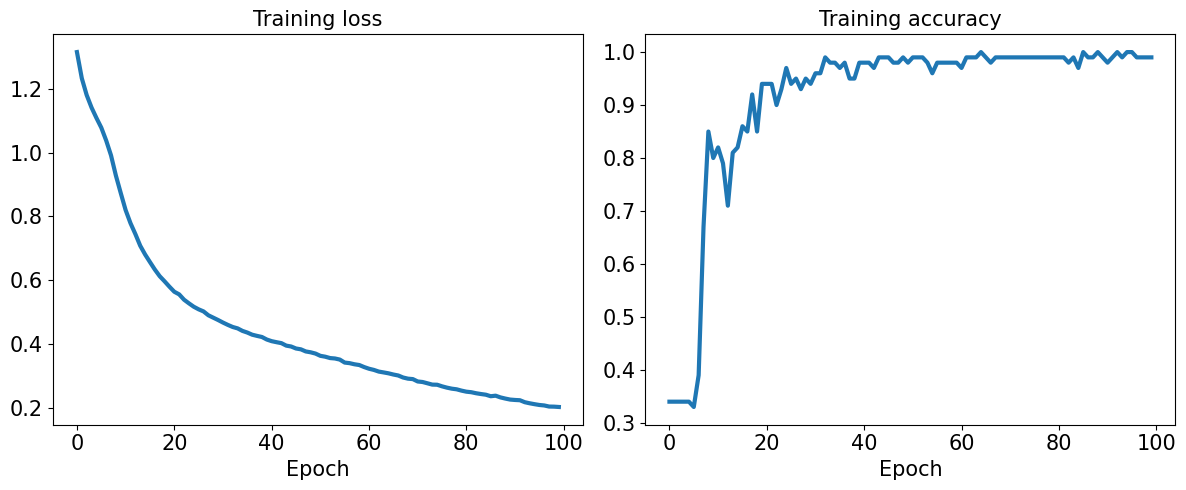

In [75]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()

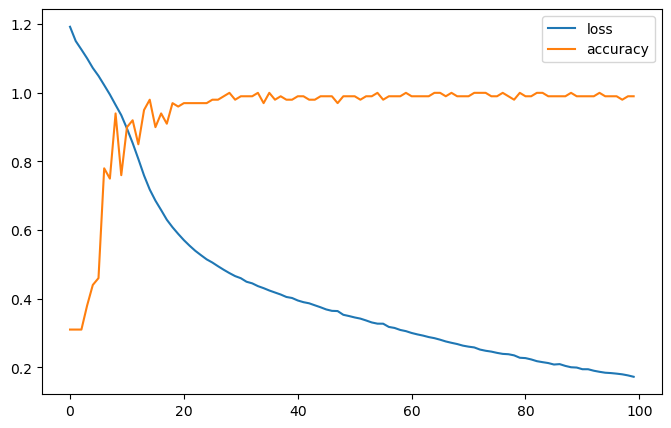

In [35]:
temp = pd.DataFrame(history.history)
temp.plot(figsize=(8,5))
plt.show()

In [84]:
#Batch size does not matter.
results = model.evaluate(Xy_test.batch(3), verbose=0)
print(f'Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}')

Test loss: 0.1632   Test Acc.: 1.0000


In [90]:
#Batch size does not matter.
y_pred = model.predict(Xy_test.batch(2), verbose=0)
print(y_pred.shape)

(50, 3)


In [88]:
print(y_pred)

[[9.7437739e-01 2.5600852e-02 2.1669923e-05]
 [4.4119681e-04 1.3043603e-01 8.6912280e-01]
 [1.3695831e-02 7.2836047e-01 2.5794372e-01]
 [5.8007671e-04 1.5372883e-01 8.4569108e-01]
 [9.7592783e-01 2.4052607e-02 1.9525964e-05]
 [6.6519126e-02 8.6627620e-01 6.7204654e-02]
 [1.3006122e-02 7.2028369e-01 2.6671013e-01]
 [4.6031233e-02 8.5668868e-01 9.7280100e-02]
 [9.7168881e-01 2.8285308e-02 2.5794398e-05]
 [2.9852829e-04 1.0343889e-01 8.9626259e-01]
 [2.7548244e-02 8.2235610e-01 1.5009564e-01]
 [9.7091436e-01 2.9058538e-02 2.7026730e-05]
 [1.8286782e-03 3.0639121e-01 6.9178003e-01]
 [9.8201746e-01 1.7972380e-02 1.0128802e-05]
 [9.7913545e-01 2.0849362e-02 1.5197799e-05]
 [9.7592270e-01 2.4057630e-02 1.9648061e-05]
 [9.7709036e-01 2.2892553e-02 1.7168095e-05]
 [9.7105128e-01 2.8921420e-02 2.7307649e-05]
 [5.3677685e-04 1.4769015e-01 8.5177308e-01]
 [3.4980517e-04 1.1356713e-01 8.8608307e-01]
 [1.2986516e-03 2.5151619e-01 7.4718523e-01]
 [2.2057735e-03 3.3912924e-01 6.5866494e-01]
 [1.032740

In [91]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [92]:
probability_model.predict(Xy_test.batch(1))

array([[0.56668466, 0.21942851, 0.21388687],
       [0.2211123 , 0.25180766, 0.52708   ],
       [0.23147279, 0.47301495, 0.29551223],
       [0.22253206, 0.25936076, 0.51810724],
       [0.56725794, 0.21897092, 0.2137711 ],
       [0.23664795, 0.52654177, 0.23681024],
       [0.23162885, 0.46985015, 0.298521  ],
       [0.23245157, 0.5228734 , 0.244675  ],
       [0.5656897 , 0.22022334, 0.21408704],
       [0.21937795, 0.24321273, 0.53740937],
       [0.23018202, 0.50962657, 0.26019147],
       [0.5654029 , 0.22045262, 0.21414456],
       [0.22990355, 0.3117565 , 0.45834   ],
       [0.5695067 , 0.21717978, 0.21331356],
       [0.56844306, 0.21802616, 0.21353076],
       [0.56725603, 0.2189724 , 0.2137715 ],
       [0.56768763, 0.2186284 , 0.21368396],
       [0.5654536 , 0.22041196, 0.21413448],
       [0.22216927, 0.2573901 , 0.52044064],
       [0.22003958, 0.24641687, 0.5335435 ],
       [0.22765486, 0.29237822, 0.47996694],
       [0.23102234, 0.32357726, 0.44540036],
       [0.